# Data Overview

The task is to analyze two tariffs plans to adjust the advertising budget. The commercial which tariff brings in more money. We are going to work with a small sample of customers, 500 Megalyne users. We want to know who they are, where they come from, what tariff they use, how many calls, and mesages sent in 2018. We are going analyze the behavior of customers and conclude which tariff is better

In [9]:
# import library

import pandas as pd

In [20]:
# read file

calls = pd.read_csv(r'C:\Users\pinos\Downloads\calls.csv')

In [21]:
# fist look at the dataset

calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


What we have here is the call date, the duration of the call and a couple ids.

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


We create a histogram to see how data is distribuited.

<AxesSubplot:>

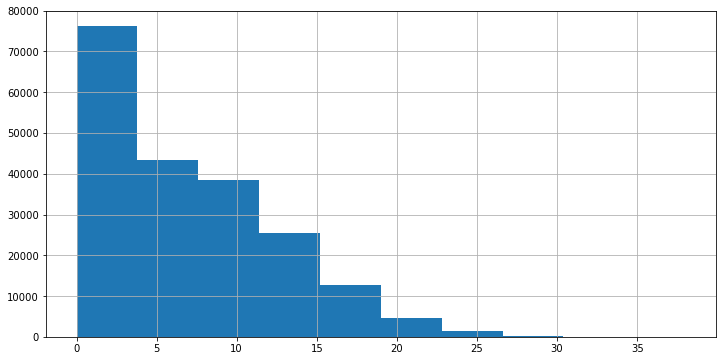

In [23]:
calls['duration'].hist(figsize=(12, 6))

As we can see the data is skewright, most af the calls are between 0 and 20 minutes. 

Now it's time to look at another dataset, we will call it sessions.

In [25]:
sessions = pd.read_csv(r'C:\Users\pinos\Downloads\internet.csv')

In [26]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


The table shows an id, an user id, the session date and the megabytes used by the user in the session.

In [82]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.1+ MB


<AxesSubplot:>

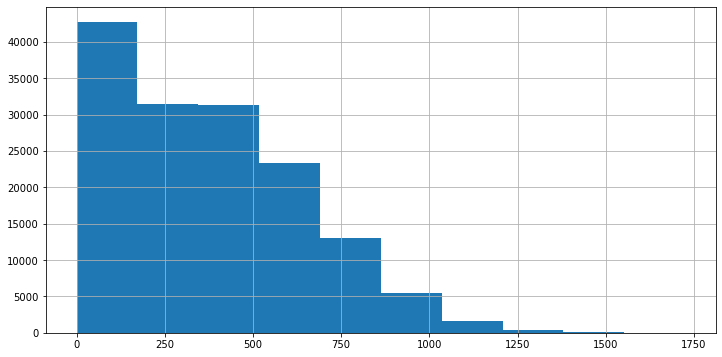

In [28]:
sessions['mb_used'].hist(figsize=(12, 6))

The graph is very similar to the one seen above, most users do not spend more than 500 mb per session.

In [40]:
messages = pd.read_csv(r'C:\Users\pinos\Downloads\messages.csv')

The messages variable reflects the identifiers and the date of the message.

In [41]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [31]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [32]:
tariffs = pd.read_csv(r'C:\Users\pinos\Downloads\tariffs.csv')

In [33]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


The table shows the characteristics of the different user options, price, mb and minutes included, etc

In [34]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 184.0+ bytes


In [35]:
users = pd.read_csv(r'C:\Users\pinos\Downloads\users.csv')


In [36]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


The users table shows the user tariff, and the personal data linked with it.

In [37]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


# Data Processing

We process the columns we are interested in to work it with the desired format date.

In [42]:
# processing of the reg_date column

users['reg_date'] = pd.to_datetime(users['reg_date'] )

# processing of churn_date column

users['churn_date'] = pd.to_datetime(users['churn_date'])

# processing the call_date column

calls['call_date'] = pd.to_datetime(calls['call_date'])

# processing the message_date column

messages['message_date'] = pd.to_datetime(messages['message_date'])

# processing of the session_date column

sessions['session_date'] = pd.to_datetime(sessions['session_date'])

In the data we found calls with zero duration. This is not a mistake: missed calls are marked with zeros, so they do not need to be deleted.

However, in the duration column of the calls dataframe, the values are fractional. We round up the values of the duration column using the numpy.ceil() method and cast the duration column to the int type.

In [43]:
import numpy as np

# rounding the values of the duration column using np.ceil() 

# and converting the type to int

calls['duration'] = np.ceil(calls['duration']).astype('int')


We delete the Unnamed: 0 column from the sessions dataframe. A column with this name occurs when data is saved with an index (df.to_csv(..., index=column)). He won't be needed right now.

In [44]:
sessions = sessions.drop('Unnamed: 0', axis=1)

We are going to create a month column in the calls dataframe with the month number from the call_date column.

In [45]:
calls['month'] = calls['call_date'].dt.month

We also create a month column in the messages dataframe with the month number from the message_date column.

In [46]:
messages['month'] = messages['message_date'].dt.month

And we create a month column in the sessions dataframe with the month number from the session_date column.

In [57]:
sessions['month'] = sessions['session_date'].dt.month

In [47]:
# counting the number of calls for each user by month

calls_per_month = calls.groupby(by=['user_id', 'month']).agg(calls=('duration', 'count'))


In [48]:
# output of the first 30 lines 

print(calls_per_month.head(30))

               calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21


Now we are going to calculate the number of minutes of conversation spent for each user by month, and we save it to the `minutes_per_month` variable. 

In [49]:
 # counting the minutes spent for each user by month

minutes_per_month = calls.groupby(
    
    by=['user_id', 'month']).agg(minutes =('duration', 'sum'))


In [50]:
# output of the first 30 lines 

print(minutes_per_month.head(30))

               minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130


We calculate the number of messages spent for each user by month, and we save it to the `messages_per_month` variable. 

In [83]:
# counting the number of messages sent for each user by month

messages_per_month = messages.groupby(
    
    by=['user_id', 'month']).agg(messages =('message_date', 'count'))


In [84]:
# displaying the first 30 lines

print(messages_per_month.head(30))

               messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38


We do the same with the sessions per month.

In [58]:
# counting spent megabytes for each user by month

sessions_per_month = sessions.groupby(
    
    by=['user_id', 'month']).agg({'mb_used': 'sum'})

In [85]:
# displaying the first 30 lines 

print(sessions_per_month.head(30))

                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04


# Data Analysis and Revenue Calculation

We combine all the values calculated above into one user_behavior dataframe. For each user month pair, information about the tariff, the number of calls, messages and megabytes spent will be available.

In [60]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of customers from the dataset have terminated the contract

In [61]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check the gaps in the user_behavior table after merging:

In [62]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [63]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

We attach information about tariffs.

In [64]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [65]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

We count the number of minutes of conversation, messages and megabytes exceeding those included in the tariff.

In [66]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

We convert megabytes exceeding the tariff into gigabytes and save them in the paid_gb column.

In [67]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

We count the revenue for minutes of conversation, messages and the Internet

In [68]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

We calculate the monthly revenue from each user, it will be stored in the total_cost column.

In [69]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The stats_df dataframe for each "month-tariff" pair will store the main characteristics.

In [70]:
# saving statistical metrics for each month-tariff pair

#  in one table stats_df (mean, standard deviation, median)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Distribution of the average number of calls by tariff types and months.

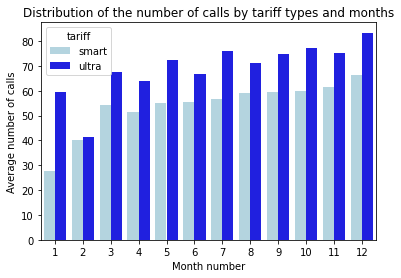

In [86]:
import seaborn as sns

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the number of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of calls');

Distribution of the number of calls and customers.

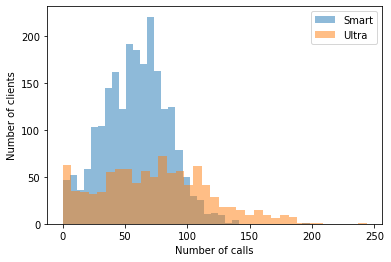

In [87]:
import matplotlib.pyplot as plt

user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.show()

Distribution of the average duration of calls by tariff types and months.

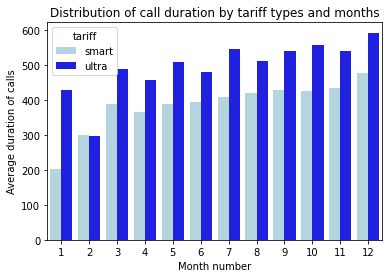

In [88]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call duration by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average duration of calls');

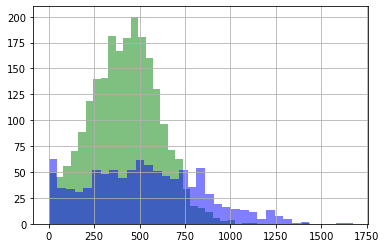

In [74]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

The average duration of conversations for subscribers of the Ultra tariff is longer than for subscribers of the Smart tariff. During the year, users of both tariffs increase the average duration of their conversations. The growth of the average duration of conversations among subscribers of the Smart tariff is uniform throughout the year. Users of the Ultra tariff do not show such linear stability. It is worth noting that in February, subscribers of both tariff plans had the lowest rates.

Distribution of the average number of messages by tariff types and months.

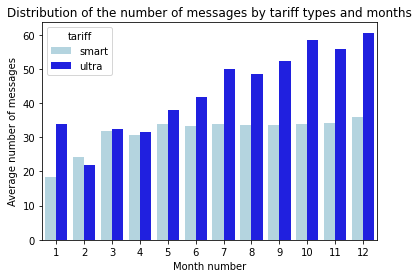

In [89]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the number of messages by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of messages');

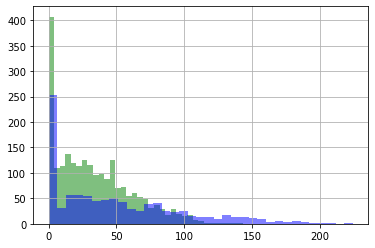

In [76]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

On average, Ultra tariff users send more messages, almost 20 messages more than Smart tariff users. The number of messages during the year on both tariffs is growing. The dynamics of sending messages is similar to the trends in the duration of conversations: in February, the smallest number of messages for the year was noted and users of the Ultra tariff also show a non-linear positive dynamics.

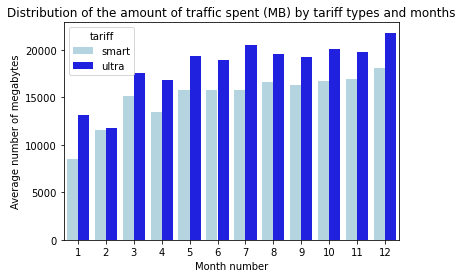

In [90]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the amount of traffic spent (MB) by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of megabytes');

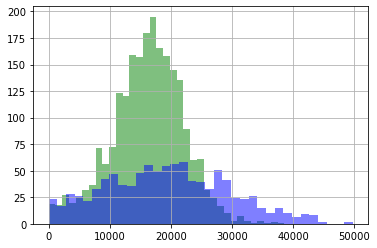

In [78]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

The least users used the Internet in January, February and April. Most often, subscribers of the Smart tariff spend 15-17 GB, and subscribers of the Ultra tariff plan spend 19-21 GB.

# Hypothesis testing

Hypothesis testing: the average revenue of users of the "Ultra" and "Smart" tariffs differ;

H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users`

H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users`
alpha = 0.05

In [79]:
from scipy import stats as st

In [91]:
# results = calling a method to test a hypothesis

smart = user_behavior[user_behavior['tariff'] =='smart']['total_cost']

ultra = user_behavior[user_behavior['tariff'] =='ultra']['total_cost']

# alpha = set the significance level value

alpha = 0.05

results = st.ttest_ind(
    
    smart,
    
    ultra,
    
    equal_var=False
    
)

# output of the p-value value 

print(results.pvalue)

# conditional operator with the output of a response string

if results.pvalue < alpha:
    
    print("We reject the null hypothesis")
    
else:
    
    print("It was not possible to reject the null hypothesis") 

4.2606313931076085e-250
We reject the null hypothesis


Hypothesis testing: users from Moscow bring in more revenue than users from other cities;

H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow`
H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow`
alpha = 0.05

In [93]:
moscow = user_behavior.loc[user_behavior['city'] == 'Москвa', 'total_cost']

other = user_behavior.loc[user_behavior['city'] != 'Москвa', 'total_cost']

results = st.ttest_ind(
    
    moscow,
    
    other,
    
    equal_var=False
    
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    
    print("We reject the null hypothesis")
    
else:
    
    print("It was not possible to reject the null hypothesis") 

nan
It was not possible to reject the null hypothesis


We conclude that the total_cost of "Ultra" users is not the same as the revenue (total_cost) of "Smart" users. By the other hand, users from Moscow bring in more revenue than users from other cities.